In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re
from IPython.display import display,HTML
from tabulate import tabulate

In [113]:
file_path='E:/Metro2/raw_data//'
df=pd.read_csv(file_path+'Data.csv')

In [114]:
for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        df[column] = df[column].apply(lambda x: 'Will use for both trips' if ',' in x else x)
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)


In [115]:
df['1'].unique()

array(['Anshu', 'Gayathri Krija', 'Gayathri Krija ', 'Govardhan G ',
       'HAMIM SADIQUE', 'HAMIM SADIQUE ', 'Hari Prasad ', 'HARIPRASAD ',
       'HariPrasad ', 'HariPrasad h', 'Keerthi M ', 'Ruthu', 'Ruthu m',
       'Ruthu m ', 'Sneha', 'sneha', 'Sneha ', 'Tulasi', 'Tulasi ',
       'tulasi ', 'Tulasi NS ', 'Vasundhara N', 'Vasundhara N '],
      dtype=object)

In [116]:
name_dict = {'Tulasi ':'Tulasi', 'Vasundhara N ': 'Vasundhara N', 'Tulasi NS ':'Tulasi',
        'Varad ':'varad', 'Varad Verma ':'varad', 'Varad Verm ':'varad',
       'Varad. Verma ':'varad', 'Varad Verma':'varad', 'Varad verma':'varad','Sneha ':'Sneha',
       'HAMIM SADIQUE ':'HAMIM','HAMIM SADIQUE':'HAMIM','Gayathri Krija ':'Gayathri','tulasi ':'Tulasi',
       'Ruthu m':'Ruthu','Ruthu m ':'Ruthu','sneha':'Sneha','HariPrasad h':'HariPrasad','Hari Prasad ':'HariPrasad','HARIPRASAD ':'HariPrasad',
       'HariPrasad ':'HariPrasad','Govardhan G ':'Govardhan','Gayathri Krija':'Gayathri'}

# map column 1 names to the above name_dict
df['1'] = df['1'].map(name_dict).fillna(df['1'])

print(df['1'].unique(),df.shape[0])

['Anshu' 'Gayathri' 'Govardhan' 'HAMIM' 'HariPrasad' 'Keerthi M ' 'Ruthu'
 'Sneha' 'Tulasi' 'Vasundhara N'] 583


In [134]:
display(HTML(f"<h2>Number of instances where income is not collected</h0>"))
# Filter rows where column '21' is NA
filtered_df = df[df['21'].isna()]

# Group by column '1' and count the instances where column '21' is NA
result = filtered_df.groupby('1').size().reset_index(name='Count')

# Calculate the total number of occurrences for each unique entry in column '1'
total_counts = df.groupby('1').size().reset_index(name='Total')

# Merge the total counts with the NA counts
merged_df = pd.merge(result, total_counts, on='1')

# Calculate the percentage of instances where column '21' is missing
merged_df['Percentage'] = round((merged_df['Count'] / merged_df['Total']) * 100,2)

# Customize column names
merged_df.columns = ['Intern', '# Instances', 'Total samples', 'Percentage']

# Set index to start from 1 for entries
merged_df.index += 1

# Convert DataFrame to tabular form
table = tabulate(merged_df, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print(table)

+--------------+-------------+---------------+------------+
|    Intern    | # Instances | Total samples | Percentage |
+--------------+-------------+---------------+------------+
|    Anshu     |      1      |      50       |    2.0     |
|   Gayathri   |      3      |      39       |    7.69    |
|  Govardhan   |      1      |      12       |    8.33    |
|    HAMIM     |     22      |      32       |   68.75    |
|    Ruthu     |      2      |      53       |    3.77    |
|    Sneha     |      1      |      63       |    1.59    |
| Vasundhara N |     86      |      148      |   58.11    |
+--------------+-------------+---------------+------------+


In [118]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
df['day'] = df['Timestamp'].dt.day
df['date'] = df['Timestamp'].dt.strftime('%d-%m-%Y')
# df['Time stamp time'] = pd.to_datetime(df['Timestamp']).apply(lambda x: x.time())
# df['Start time of survey']=pd.to_datetime(df['Start time of survey'])
# df['Start time of survey'] = df['Start time of survey'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))


In [135]:
display(HTML(f"<h2>Dates of survey done by each intern</h0>"))

sorted_names = sorted(df['1'].unique())

# Find the length of the longest name for uniform spacing
max_name_length = max(len(name) for name in sorted_names)

# Print the names and their corresponding unique dates with proper spacing
for name in sorted_names:
    unique_dates = sorted(df[df['1'] == name]['date'].unique())
    dates_str = ', '.join(unique_dates)
    count = len(unique_dates)
    print(f"{name:<{max_name_length}} ({count}) : {dates_str}")

Anshu        (3) : 06-05-2024, 07-05-2024, 18-05-2024
Gayathri     (2) : 06-05-2024, 07-05-2024
Govardhan    (2) : 08-05-2024, 09-05-2024
HAMIM        (2) : 05-05-2024, 10-05-2024
HariPrasad   (2) : 08-05-2024, 09-05-2024
Keerthi M    (10) : 01-05-2024, 02-05-2024, 03-05-2024, 05-05-2024, 08-05-2024, 10-05-2024, 11-05-2024, 12-05-2024, 17-05-2024, 18-05-2024
Ruthu        (5) : 05-05-2024, 08-05-2024, 10-05-2024, 17-05-2024, 18-05-2024
Sneha        (5) : 02-05-2024, 03-05-2024, 07-05-2024, 08-05-2024, 17-05-2024
Tulasi       (5) : 01-05-2024, 02-05-2024, 03-05-2024, 04-05-2024, 05-05-2024
Vasundhara N (10) : 01-05-2024, 02-05-2024, 03-05-2024, 04-05-2024, 05-05-2024, 08-05-2024, 11-05-2024, 12-05-2024, 17-05-2024, 18-05-2024


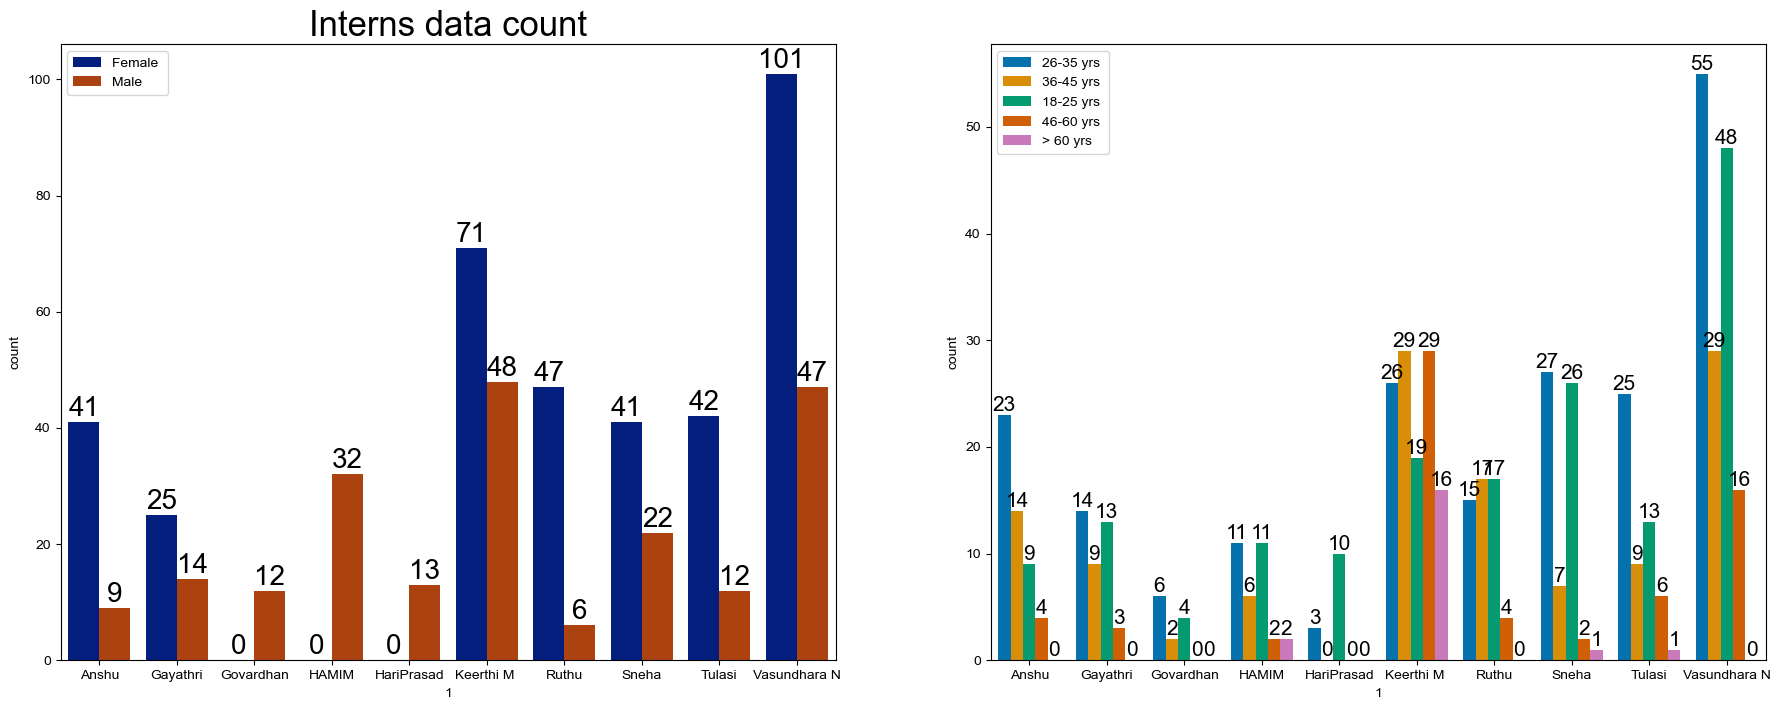

In [121]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(22,8))
sns.countplot(x=df['1'],data=df,palette = 'dark',hue='17',saturation=0.95,ax=ax[0])
ax[0].set_title('Interns data count',color='black',size=25)
ax[0].legend()
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
sns.countplot(x=df['1'],data=df,palette = 'colorblind',hue='18',saturation=0.95,ax=ax[1])
ax[1].legend()
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)   


In [122]:
df['23'].unique()

array(['No, I will not use a bicycle. ',
       'If a marked cycle lane is provided. Per Trip cost 1₹. Parking cost 10₹ per day. ',
       'If a segregated cycle track is provided. Per Trip cost 3₹.. Parking cost 10₹ per day. ',
       'Not Applicable- because neither of my trip end is home. ',
       'If a marked cycle lane provided along with bicycle traffic signals is provided. Per Trip cost 2₹. Parking cost 10₹ per day. ',
       'Current travelling conditions with no special cycling facility. Per Trip cost 0₹. Parking cost of 10₹ per day. ',
       'If a segregated cycle track with bicycle signal is provided. Per Trip cost 4₹. Parking cost 10₹ per day. ',
       'If a segregated cycle track is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 3₹ .',
       'If a marked cycle lane is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 1₹. ',
       'If a marked cycle lane is provided

In [123]:
parking_dict={'No, I will not use a bicycle. ':'Will not use',
       'Current travelling conditions with no special cycling facility. Per Trip cost 0₹. Parking cost of 10₹ per day. ':'Current conditions',
       'If a marked cycle lane is provided. Per Trip cost 1₹. Parking cost 10₹ per day. ':'Marked lane',
       'Not Applicable- because neither of my trip end is home. ':'NA',
       'If a marked cycle lane provided along with bicycle traffic signals is provided. Per Trip cost 2₹. Parking cost 10₹ per day. ':'Marked lane + signal',
       'If a segregated cycle track is provided. Per Trip cost 3₹.. Parking cost 10₹ per day. ':'Segregated track',
       'If a segregated cycle track with bicycle signal is provided. Per Trip cost 4₹. Parking cost 10₹ per day. ':'Segregated track + signal'}

df['23']=df['23'].map(parking_dict).fillna(df['23'])

In [124]:
df['23'].unique()

array(['Will not use', 'Marked lane', 'Segregated track', 'NA',
       'Marked lane + signal', 'Current conditions',
       'Segregated track + signal',
       'If a segregated cycle track is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 3₹ .',
       'If a marked cycle lane is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 1₹. ',
       'If a marked cycle lane is provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 2₹.  ',
       'If a segregated cycle track provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 4₹ . .                                                                                                                                                                     .',
       'Current t

In [141]:
display(HTML(f"<h2>Origin and destination both are not home and response to Q23 was recorded as willing to use their own bicycle</h2>"))

In [125]:
# lets get the count of number of instances for each unique value of column 1 where when column 4 and column 6 both are not equal to Home and also column 23 
# is not equal to NA
print(df[(df['4']!='Home ') & (df['6']!='Home ') & (df['23']!='NA')]['1'].value_counts())

1
Keerthi M       18
Anshu            5
HAMIM            5
Govardhan        3
Gayathri         2
Tulasi           2
Vasundhara N     2
Sneha            1
Name: count, dtype: int64


### Check of qualification with age 

In [126]:
# lets see the value counts of each value in column 19 for each unique entry of column 18
df.groupby('18')['19'].value_counts()

18          19                        
18-25 yrs   Graduate                      120
            12th Std.                      23
            Trade/Diploma Certificate      16
            Postgraduate                    8
            10th Std.                       3
26-35 yrs   Graduate                      143
            Postgraduate                   20
            Trade/Diploma Certificate      19
            12th Std.                      14
            10th Std.                       6
            < 10th Std.                     2
            Doctorate                       1
36-45 yrs   Graduate                       51
            12th Std.                      28
            Postgraduate                   16
            Trade/Diploma Certificate      11
            10th Std.                      11
            < 10th Std.                     4
            Doctorate                       1
46-60 yrs   12th Std.                      29
            Graduate                     

### Age and occupation

In [127]:
df.groupby('18')['20'].value_counts()

18          20                           
18-25 yrs   Student                          134
            Employed Private                  34
            Daily Wage                         1
            Business                           1
26-35 yrs   Employed Private                 144
            Unemployed/Retired/Homemaker      33
            Employed Govt.                     9
            Student                            9
            Business                           8
            Daily Wage                         2
36-45 yrs   Employed Private                  57
            Unemployed/Retired/Homemaker      43
            Business                          10
            Employed Govt.                     6
            Daily Wage                         6
46-60 yrs   Unemployed/Retired/Homemaker      32
            Employed Private                  17
            Employed Govt.                    12
            Business                           3
            Daily Wage     

#### Prints if the respondent reported as unemployed but his details such as age, OD are not consistent

In [142]:
df['20'].unique()

# for each entry of column 20 with 'Unemployed/Retired/Homemaker ' get the column 1 and column Timestamp if column 18 is not >60 yrs or 46-60 yrs,
#  and column 4 is work and column 6 is work
df[(df['20']=='Unemployed/Retired/Homemaker ') & (df['18']!='>60 yrs') & (df['18']!='46-60 yrs') & ((df['4']=='Work ') | (df['6']=='Work '))][['1','Timestamp']]

# df[df['20']=='Unemployed/Retired/Homemaker '][['18','17','4','6']]

,1,Timestamp


In [129]:
df[df['1']=='HariPrasad']['5'].unique()

array(['Ulall', 'Sirike bus bus Stop',
       'Community institute of management, jayanagar ',
       'Ashok Nagar police station ', 'Mejestrict court ', 'Acs college ',
       'Bidadi', 'MC layout ', 'Ramurthy nagar', 'ITPL', 'Rohan avrithi',
       'Near byapnalli ground ', 'Malleswaram '], dtype=object)

### Sanity check for total time

In [130]:
from tabulate import tabulate

output_rows = []

total_10b_11b = df['10a'] + df['11a']
df['9'] = pd.to_numeric(df['9'], errors='coerce')

# Create a list of tuples containing the relevant information
for index, value in df.iterrows():
    if total_10b_11b[index] >= value['9'] - 5:
        output_rows.append([
            value['1'],   # Intern
            index,        # Index
            value['9'],   # Total Time
            value['10a'], # Access Time
            value['11a'], # Egress Time
            value['9']-value['10a']-value['11a'], #difference
            value['2c'],  #Origin
            value['2d'], #Destination
        ])

# Sort the list of tuples based on the enumerator name alphabetically
output_rows.sort(key=lambda x: x[0])

# Print the output as a table
print(tabulate(output_rows, headers=["Intern","Index", "Total Time", "Access Time", "Egress Time","Time in metro","Origin","Destination"]))


Intern          Index    Total Time    Access Time    Egress Time    Time in metro  Origin                                              Destination
------------  -------  ------------  -------------  -------------  ---------------  --------------------------------------------------  -------------------------------------------
Anshu               1            20              5             10                5  Pantharapalya - Nayandahalli                        Jnanabharathi
Anshu              22            20             10              5                5  Seetharampalya                                      Krishnarajapuram - K.R.Puram
Anshu              45            20             10              5                5  Konanakunte Cross                                   Silk Institute
Gayathri           51            20             15              5                0  Rajarajeshwari Nagar                                Kengeri Bus Terminal
Gayathri           53            30             1

### Sanity check for bicycle question

In [131]:
for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        for index, value in df[column].items():
            if value.count(',') > 1:
                print(f"Intern: {df.iloc[index]['1']}, Question: {column}, Index: {index}")
